In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# ABPC

In [2]:
abpc = pd.read_csv('D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\ABPC\\abpc_2018-01-01.csv', delimiter=';', names=['ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT'])

In [3]:
abpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 12 columns):
ID                                                13784 non-null int64
FLIGHTID                                          13784 non-null int64
LECTOR ID                                         13784 non-null object
CHECK DATE                                        13784 non-null object
STATUS                                            13784 non-null object
REASON                                            294 non-null object
CHECKIN SEQUENCE NUMBER                           13784 non-null object
PNR                                               13777 non-null object
DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE    13784 non-null object
DEPARTURE FLIGHT AIRLINE IATA CODE                13784 non-null object
DEPARTURE FLIGHT NUMBER                           13784 non-null int64
DEPARTURE FLIGHT SOBT                             13784 non-null object
dtypes: int64(3), object(9)
memo

In [26]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,DWELL TIME
0,9223629,9211112,aia-abpc-abg014,2018-01-01 00:12:00,0,NaN,0082,VADYGL,0082,A3,610,2018-01-01 06:35:00,6.383333
1,9223630,9211112,aia-abpc-abg015,2018-01-01 00:12:00,0,NaN,0061,VADYGL,0061,A3,610,2018-01-01 06:35:00,6.383333
2,9223631,9203297,aia-abpc-wks006,2018-01-01 00:49:00,0,NaN,0041,MFTBYC,0041,A3,926,2018-01-01 05:30:00,4.683333
3,9223632,9203297,aia-abpc-wks006,2018-01-01 00:49:00,0,NaN,0040,MFTBYC,0040,A3,926,2018-01-01 05:30:00,4.683333
4,9223633,9203275,aia-abpc-abg002,2018-01-01 01:23:00,0,NaN,0041,DAJYGW,0041,AZ,717,2018-01-01 03:55:00,2.533333


In [21]:
abpc.loc[abpc['STATUS']!=0]['REASON'].values.sum()

0

In [22]:
abpc.loc[abpc['STATUS']==0]['REASON'].values

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [23]:
#abpc['STATUS'].loc[abpc['STATUS']!='PASSED'].values
abpc['STATUS'].unique()

array([0], dtype=int64)

In [24]:
abpc['REASON'].unique()

array([nan, 'FastTrackIndicatorRequiredAccept', 'PaxAlreadyPassedAccept',
       'InvalidFlightStateAccept', 'InvalidDateAccept'], dtype=object)

In [29]:
abpc['CHECK DATE'].isnull().sum()

0

### Preprocesamiento de datos

In [25]:
# Encode Categorycal Variables

# STATUS

labelencoder_X = LabelEncoder()
abpc.iloc[:, 4] = labelencoder_X.fit_transform(abpc.iloc[:, 4])

# 0 PASSED
# 1 NOT PASSED

In [12]:
# Dates to Datetime

# Check-Date
date_check = pd.to_datetime(abpc['CHECK DATE'],format = '%d/%m/%Y %H:%M')
abpc['CHECK DATE']=date_check.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

# Departure Date
date_dep = pd.to_datetime(abpc['DEPARTURE FLIGHT SOBT'],format = '%d/%m/%Y %H:%M')
abpc['DEPARTURE FLIGHT SOBT']=date_dep.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

# Adding a variable: Dwell Time (Check - Departure)

# Dwell Time
dwell_time = date_dep - date_check
abpc['DWELL TIME'] = dwell_time.map(lambda x: x.total_seconds()/3600)

In [31]:
abpc['DWELL HOUR'] = abpc['DWELL TIME'].map(lambda x: int(x))

abpc['DWELL MIN'] = abpc['DWELL TIME'].map(lambda x: (x-int(x))*60)

abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []
for dwt in abpc['DWELL TIME'].loc[pd.isna(abpc['REASON'])].unique(): # Cogemos los de razones nulas
    num = list(abpc['DWELL TIME']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)

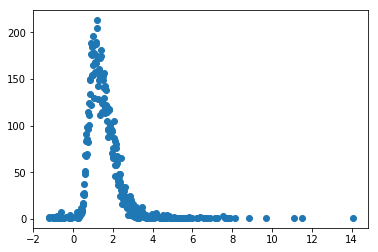

In [32]:
plt.scatter(dwtime,counts)

In [33]:
abpc.loc[abpc['DWELL HOUR']<0]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,DWELL TIME,DWELL HOUR,DWELL MIN
6264,9231058,9193704,aia-abpc-wks002,2018-01-01 10:22:00,0,InvalidFlightStateAccept,0095,TLF288,0095,OA,114,2017-12-31 11:30:00,-22.866667,-22,-52.0
12719,9238465,9221613,aia-abpc-wks006,2018-01-01 17:42:00,0,NaN,0044,PSTRVM,0044,GF,40,2018-01-01 16:40:00,-1.033333,-1,-2.0
12753,9238504,9221613,aia-abpc-wks006,2018-01-01 17:45:00,0,NaN,0034,KVPTZW,0034,GF,40,2018-01-01 16:40:00,-1.083333,-1,-5.0
12754,9238505,9221613,aia-abpc-wks006,2018-01-01 17:45:00,0,NaN,0033,KVPTZW,0033,GF,40,2018-01-01 16:40:00,-1.083333,-1,-5.0
12811,9238579,9221613,aia-abpc-wks006,2018-01-01 17:52:00,0,NaN,0004,AZSYRE,0004,GF,40,2018-01-01 16:40:00,-1.200000,-1,-12.0
12819,9238588,9221613,aia-abpc-wks006,2018-01-01 17:54:00,0,NaN,0037,FMGXJH,0037,GF,40,2018-01-01 16:40:00,-1.233333,-1,-14.0
12821,9238590,9221613,aia-abpc-wks006,2018-01-01 17:54:00,0,NaN,0036,FMGXJH,0036,GF,40,2018-01-01 16:40:00,-1.233333,-1,-14.0


TAREAS

Variables interesantes
JOINS--> FLIGHTID, CODIGOS

Transformaciones
STATUS
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/


¿Volumen de pasajeros en el tiempo? nºpassajeros vs. check date
Calcular tiempo waiting time . nº passajeros vs. wainting time y clusterización por hora de vuelo y clase de pasajero (histograma)

In [48]:
flight = pd.read_csv('D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\FlightList\\FlightList_2018-01-01.csv', delimiter=';', header = 0)

In [49]:
flight.head()

,REGISTRATION,ARR ID,ARR C/S,DEP ID,DEP C/S,A/C Type ICAO,A/C Type IATA,ADEP IATA,ADEP ICAO,ADES IATA,...,CONNECTING PAX,CHECKED PAX,BOARDED PAX,SECURITY IN PAX,% SECURITY IN PAX,GROUND HANDLING AGENT,PAX ID,ASBT,AEBT,TIMESTAMP
0,SXOBC,A3991,AEE991,OA248,OAL248,DH8D,DH4,IST,LTBA,SMI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018 23:50
1,EIEVV,FR027,RYR027,FR028,RYR028,B738,73H,SKG,LGTS,SKG,...,NaN,NaN,NaN,132.0,84.0,NaN,NaN,01/01/2018 20:00,01/01/2018 20:46,01/01/2018 23:50
2,SXONE,GQ275,SEH275,GQ159,SEH159,AT75,A75,CFU,LGKR,HER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018 23:50
3,SXGRI,GQ241,SEH241,GQ157,SEH157,AT45,AT5,JKH,LGHI,HER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018 23:50
4,NaN,A3655,NaN,OA344,NaN,NaN,321,FCO,NaN,CHQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018 23:50


In [58]:
# ID / ESTADO

#flight.loc[flight['SOBT']=='01/01/2018 16:40'].iloc[:,0:12]

#flight.loc[flight['SOBT']=='01/01/2018 06:40'].iloc[:,0:12]
flight.loc[flight['DEP ID']=='A3926'].iloc[:,0:12]


,REGISTRATION,ARR ID,ARR C/S,DEP ID,DEP C/S,A/C Type ICAO,A/C Type IATA,ADEP IATA,ADEP ICAO,ADES IATA,ADES ICAO,STATUS


In [59]:
# RETRASO

#flight.loc[flight['SOBT']=='01/01/2018 16:40'].iloc[:,12:18]

flight.loc[flight['DEP ID']=='A3926'].iloc[:,12:18]

,DCD1,DCD2,DTD1,DTD2,SLDT,ELDT


In [67]:
# Salir del parking

flight.loc[flight['SOBT']=='02/01/2018 05:30'].iloc[:,25:29]

#flight.loc[flight['DEP ID']=='A3926'].iloc[:,25:29]

,SOBT,EOBT,TOBT,AOBT


In [30]:
flight.columns

Index(['REGISTRATION', 'ARR ID', 'ARR C/S', 'DEP ID', 'DEP C/S',
       'A/C Type ICAO', 'A/C Type IATA', 'ADEP IATA', 'ADEP ICAO', 'ADES IATA',
       'ADES ICAO', 'STATUS', 'DCD1', 'DCD2', 'DTD1', 'DTD2', 'SLDT', 'ELDT',
       'TLDT', 'ALDT', 'SIBT', 'EIBT', 'AIBT', 'PK', 'GATE', 'SOBT', 'EOBT',
       'TOBT', 'AOBT', 'STOT', 'ETOT', 'TTOT', 'CTOT', 'ATOT', 'TTOT-IN',
       'CTOT-IN', 'AREG+', 'DREG+', 'ATOT-IN', 'ETOT-IN', 'EOBT-IN',
       'TOBT-PAX', 'TIME AT GATE', 'MAX PAX', 'ESTIMATED PAX',
       'CONNECTING PAX', 'CHECKED PAX', 'BOARDED PAX', 'SECURITY IN PAX',
       ' % SECURITY IN PAX', 'GROUND HANDLING AGENT', 'PAX ID', 'ASBT', 'AEBT',
       'TIMESTAMP'],
      dtype='object')

In [31]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 55 columns):
REGISTRATION             196 non-null object
ARR ID                   260 non-null object
ARR C/S                  200 non-null object
DEP ID                   260 non-null object
DEP C/S                  165 non-null object
A/C Type ICAO            201 non-null object
A/C Type IATA            260 non-null object
ADEP IATA                259 non-null object
ADEP ICAO                200 non-null object
ADES IATA                259 non-null object
ADES ICAO                200 non-null object
STATUS                   260 non-null object
DCD1                     7 non-null object
DCD2                     2 non-null object
DTD1                     7 non-null float64
DTD2                     3 non-null float64
SLDT                     260 non-null object
ELDT                     200 non-null object
TLDT                     0 non-null float64
ALDT                     104 non-null object
SI

INVESTIGAR POR QUÉ HAY MUY POCAS VARIABLES DE ALGUNAS VARIABLES. ¿CUANDO APLICA USAR UNA U OTRA?

In [62]:
flight_2 = pd.read_csv('D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\FlightList\\FlightList_2018-01-02.csv', delimiter=';', header = 0)

In [65]:
# Salir del parking

flight_2.loc[flight_2['DEP ID']=='A3926'].iloc[:,25:29]

,SOBT,EOBT,TOBT,AOBT
236,03/01/2018 15:00,NaN,03/01/2018 15:00,NaN
